In [1]:
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt #Libraries for visualization
import seaborn as sns
import numpy as np #Library for numerical calculations
from scipy import stats #Library for statistical analysis 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler #Min max Scaler for normalization of data to range [0,1]
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV #Importing the linear regression models
from sklearn.metrics import mean_squared_error #For evaluation of the models
%matplotlib notebook

In [21]:
ch = fetch_california_housing(as_frame=True)
ch

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

In [24]:
feature_names = ch.feature_names
number_of_features = len(feature_names)
X = ch.data.astype(float)
y = ch.target
print(X)
print(y)
print(X.shape)
print(y.shape)
print(feature_names)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

<IPython.core.display.Javascript object>


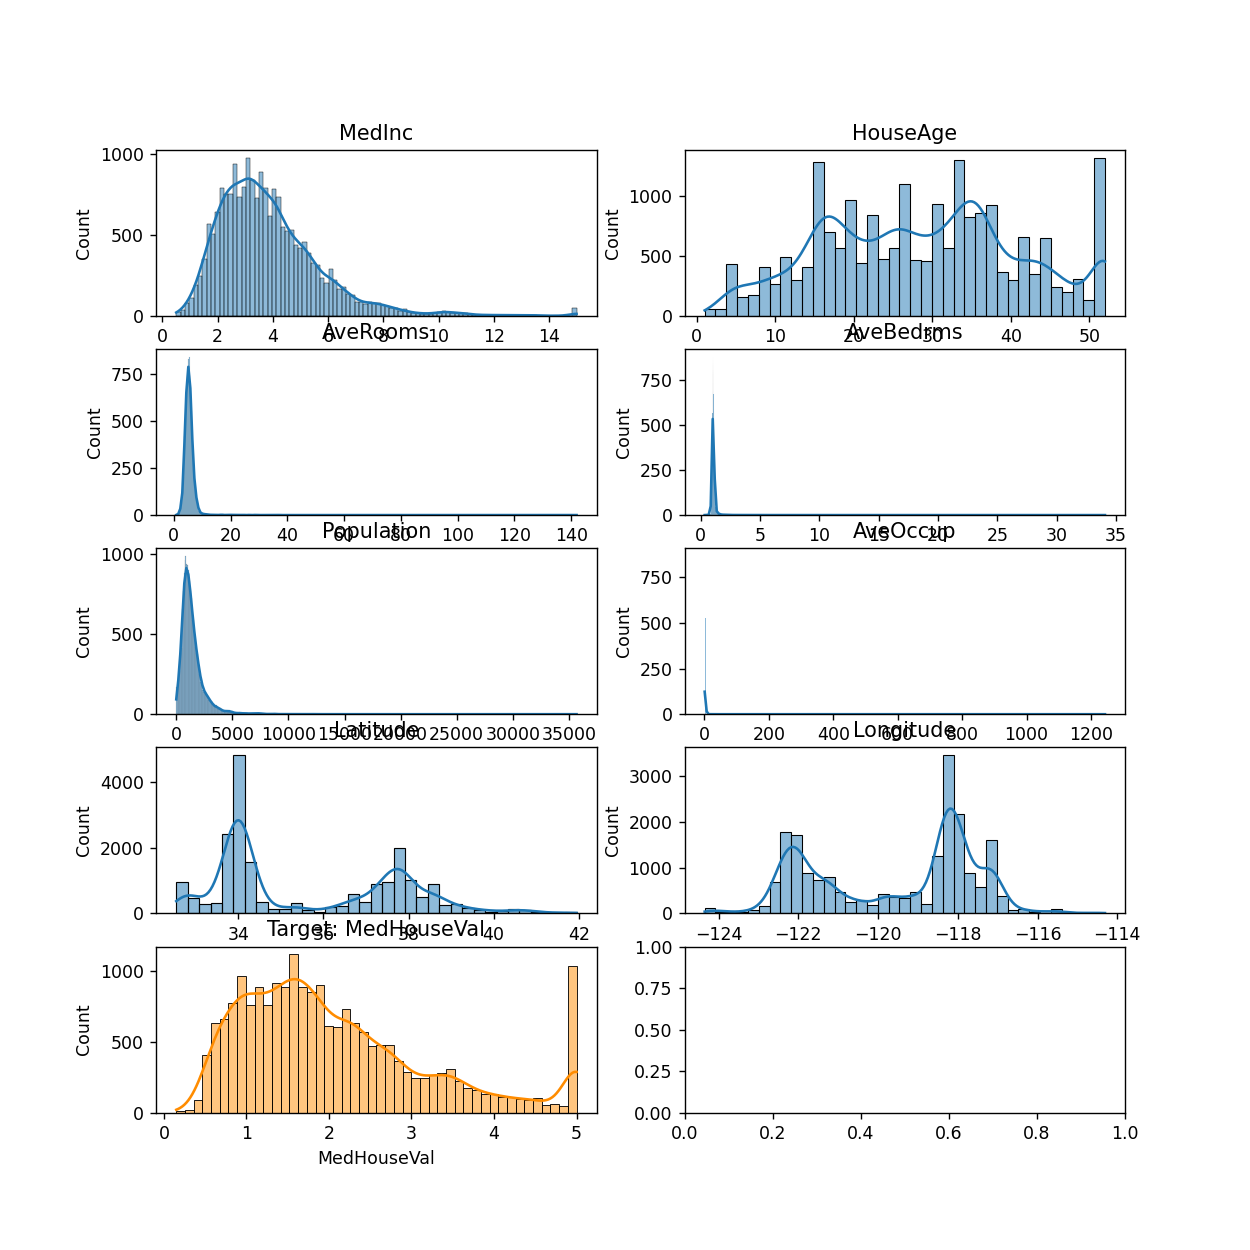

In [30]:
#feature dist
fig = plt.figure(figsize=(10, 10))
fig.subplots(number_of_features//2+1, ncols=2)
count = 1
for feat in feature_names: #The histograms of the features
    ax = plt.subplot(number_of_features//2+1,2, count)
    count+=1
    plt.title(feat) 
    sns.histplot(data=X, x = feat, kde = True)
ax = plt.subplot(number_of_features//2+1,2, 9)
plt.title("Target: " + ch.target_names[0]) 
sns.histplot(y, color = "darkorange", kde = True) #The histograms of the target variable
plt.show()

<IPython.core.display.Javascript object>


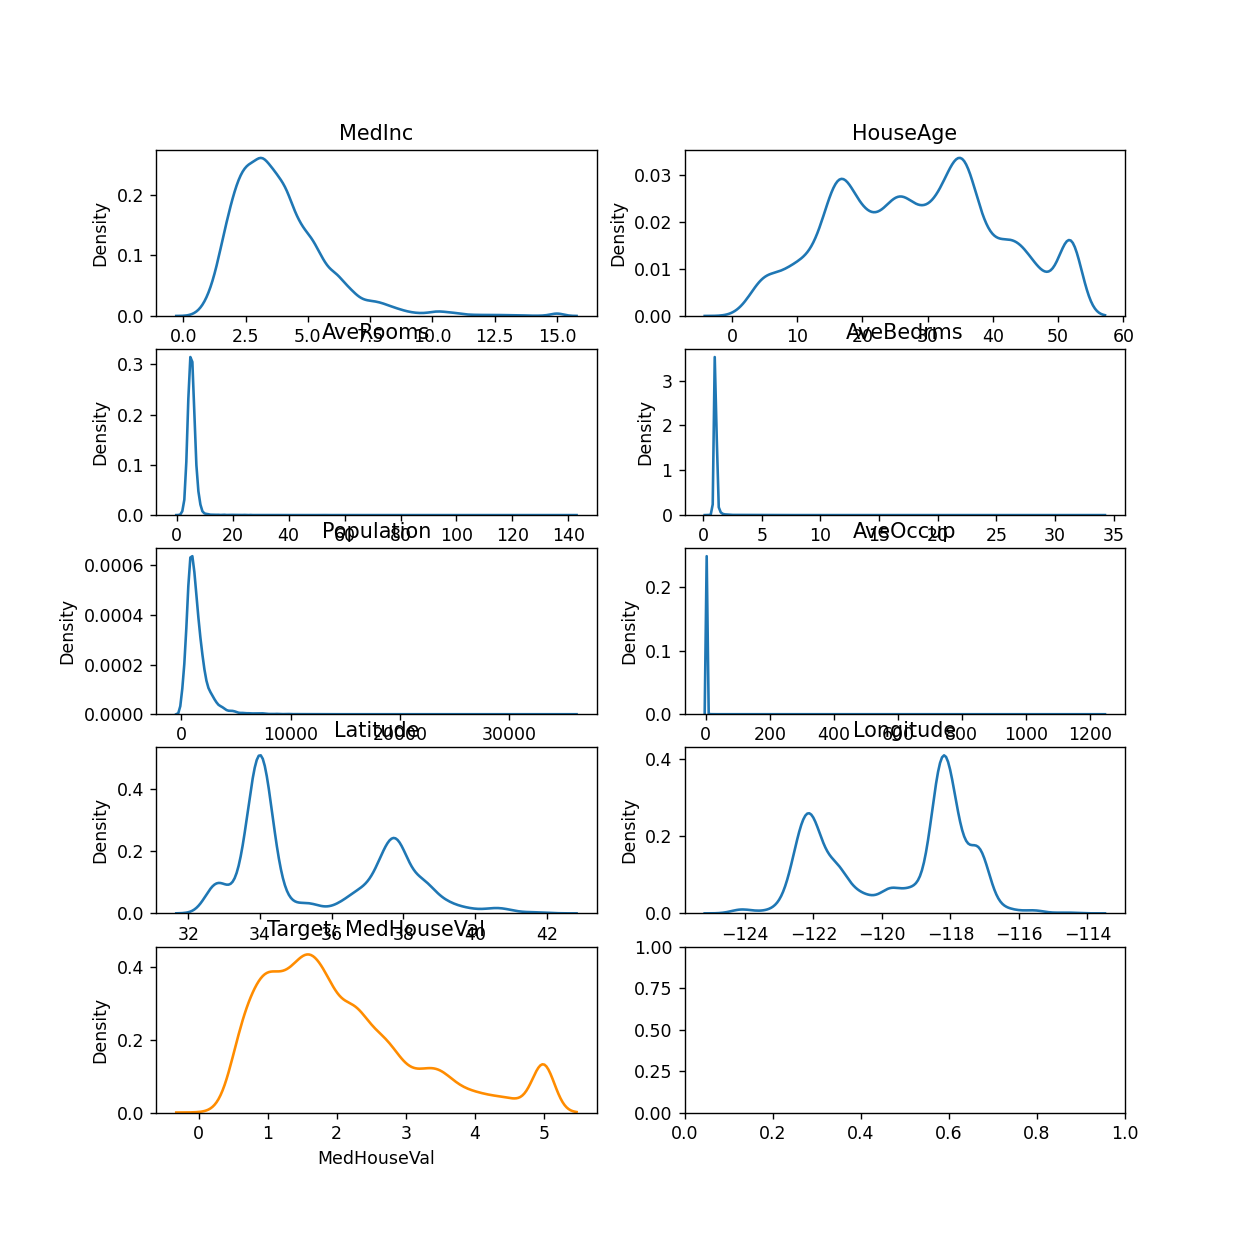

In [32]:
#feature density
fig = plt.figure(figsize=(10, 10))
fig.subplots(number_of_features//2+1, ncols=2)
count = 1
for feat in feature_names: #The histograms of the features
    ax = plt.subplot(number_of_features//2+1,2, count)
    count+=1
    plt.title(feat) 
    sns.kdeplot(data=X, x = feat)
ax = plt.subplot(number_of_features//2+1,2, 9)
plt.title("Target: " + ch.target_names[0]) 
sns.kdeplot(y, color = "darkorange") #The histograms of the target variable
plt.show()

<IPython.core.display.Javascript object>


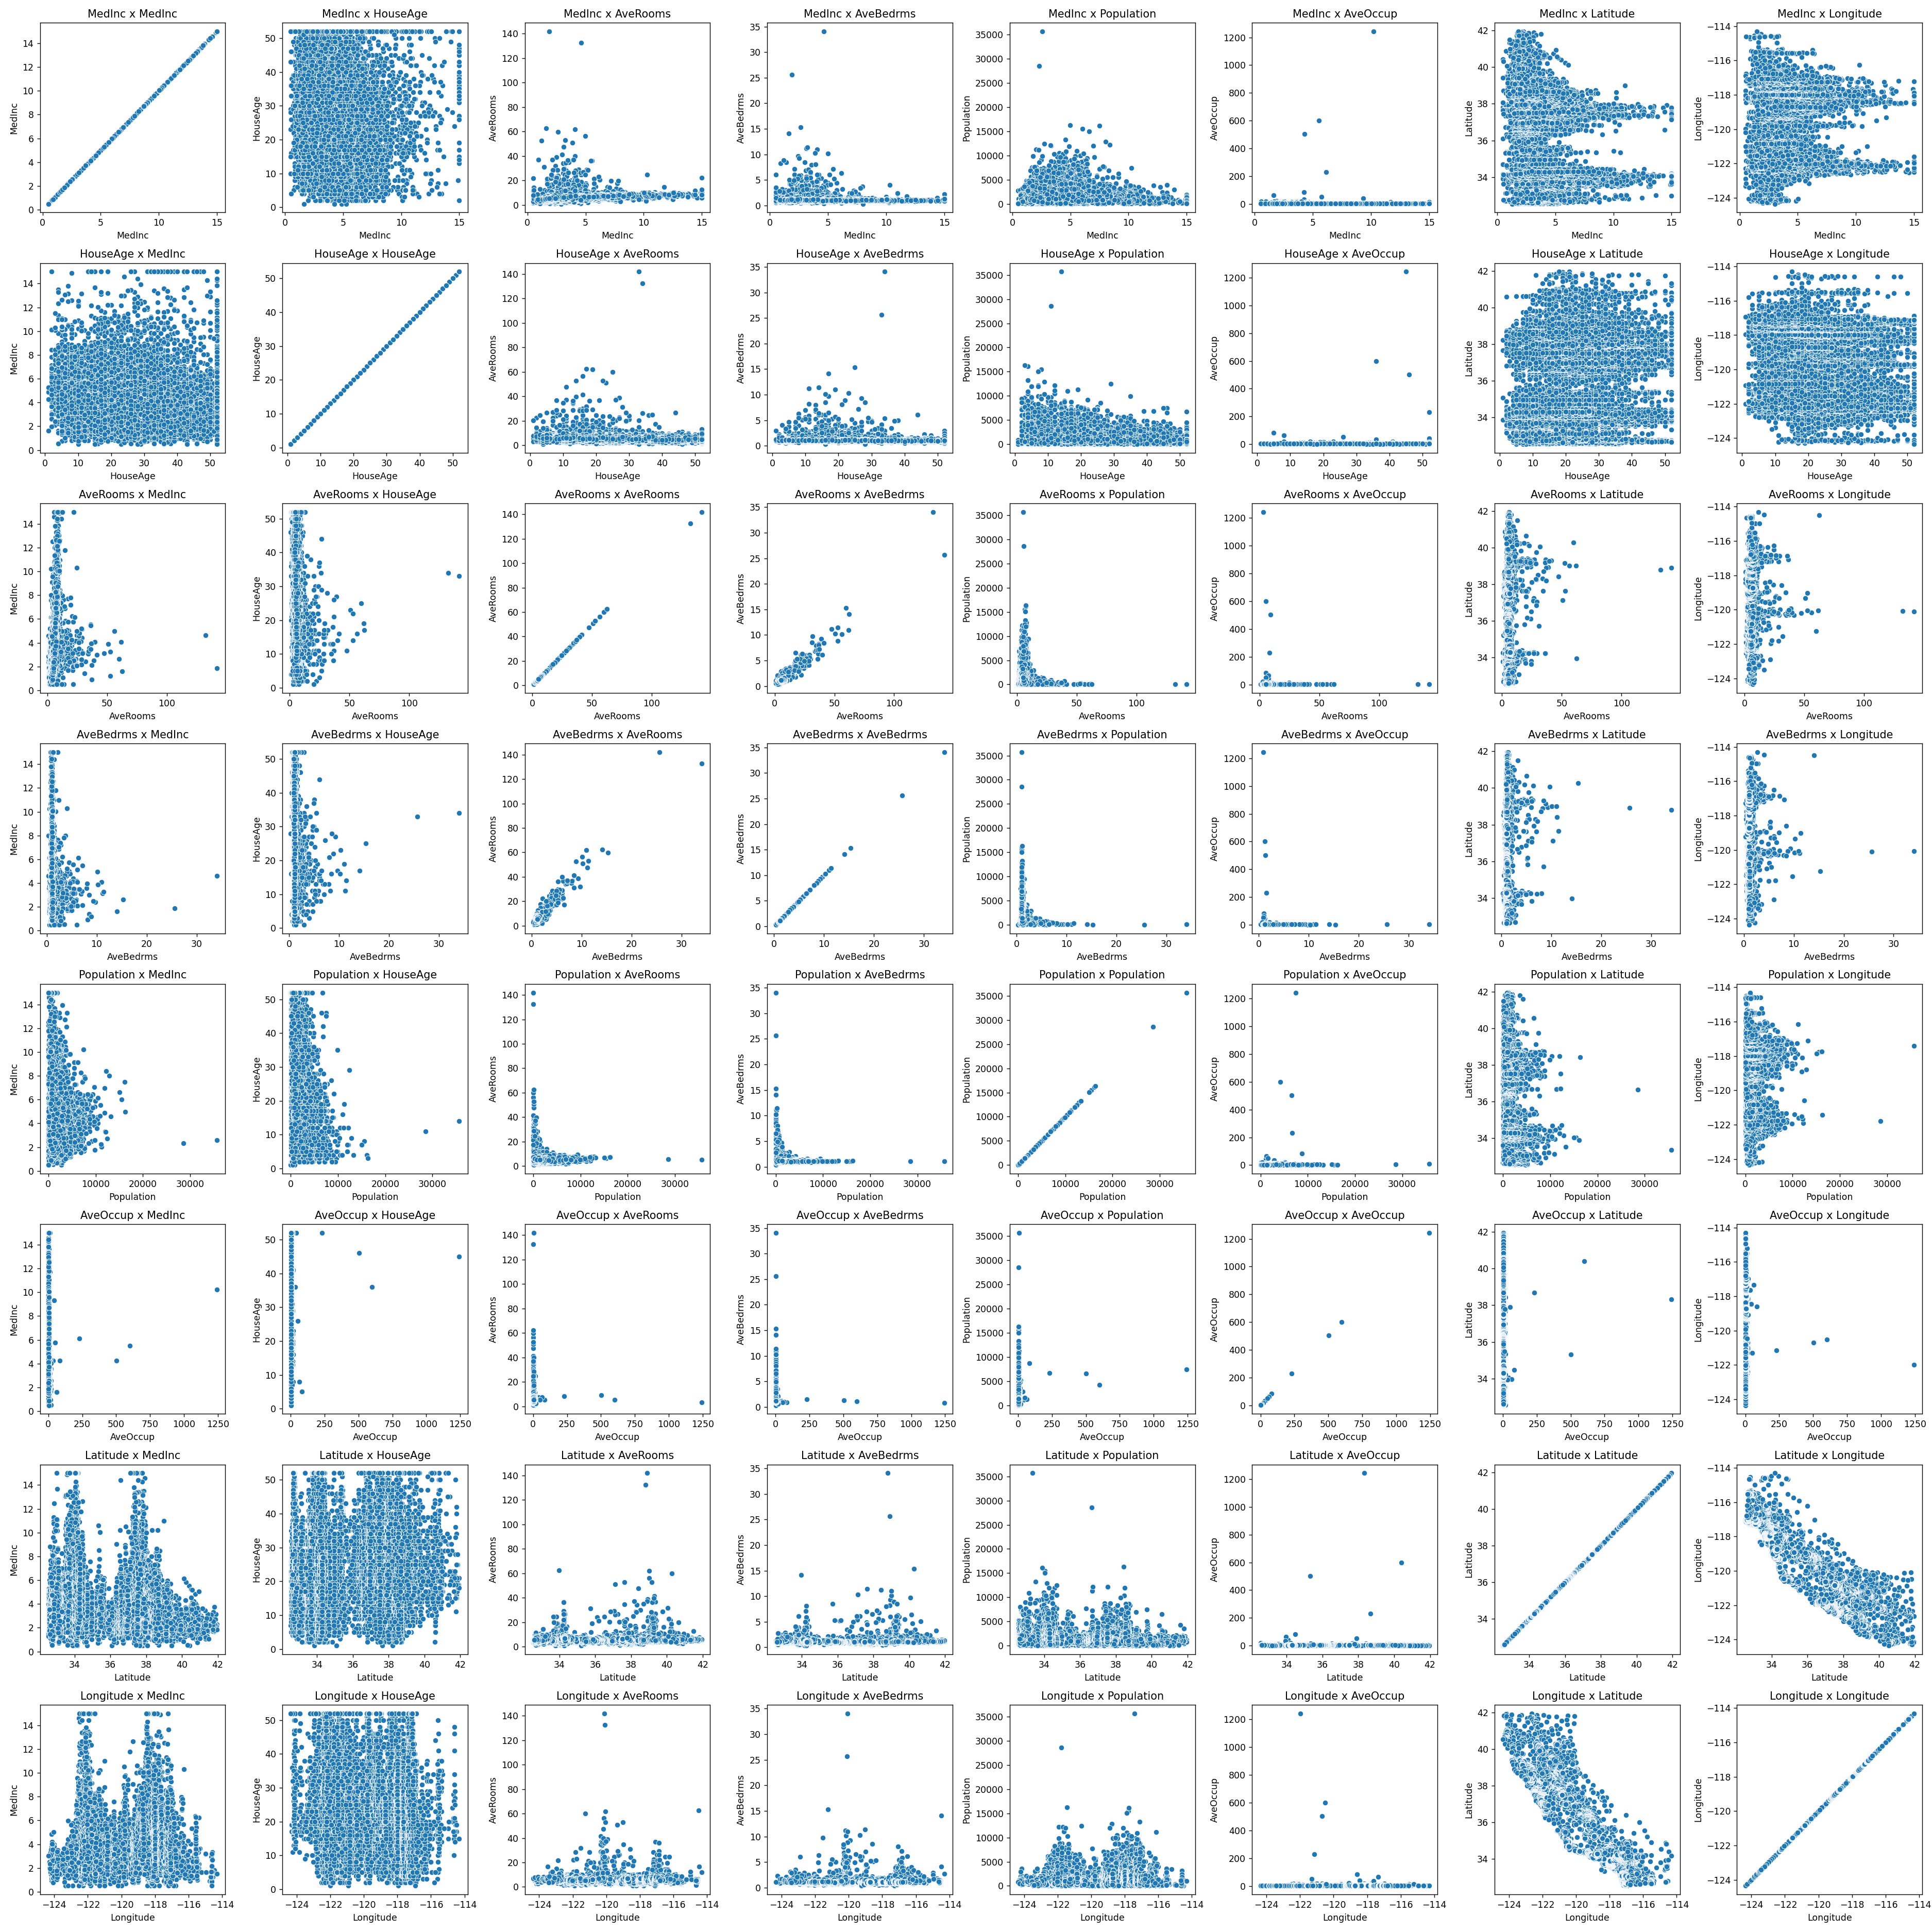

In [47]:
#features scatter
fig = plt.figure(figsize=(30, 30))
fig.subplots(nrows=number_of_features, ncols=number_of_features)
count = 1
for feat in feature_names:
    for feat2 in feature_names:
        ax = plt.subplot(number_of_features, number_of_features, count)
        count+=1
        plt.title(feat+' x '+feat2) 
        sns.scatterplot(data=X, x = feat, y = feat2)
fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


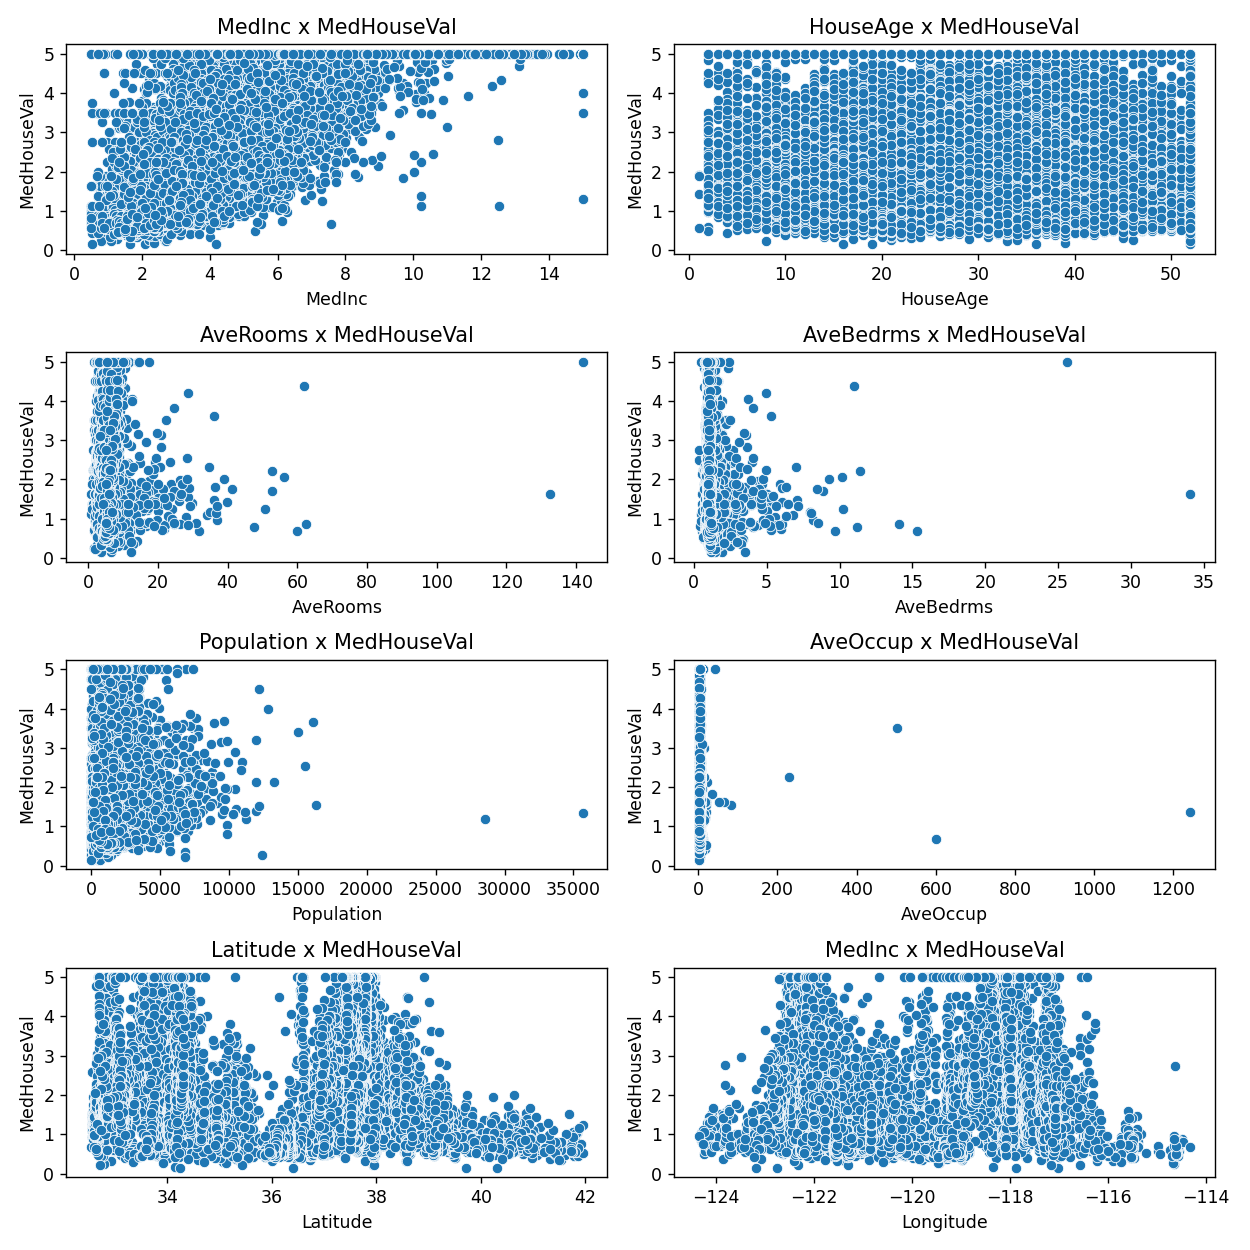

In [49]:
#feature target scatter
fig = plt.figure(figsize=(10, 10))
fig.subplots(nrows=4, ncols=2)
count = 1
for feat in feature_names:
    ax = plt.subplot(4, 2, count)
    count+=1
    plt.title(feat+' x '+ch.target_names[0]) 
    sns.scatterplot(data=X, x = feat, y = y)
fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


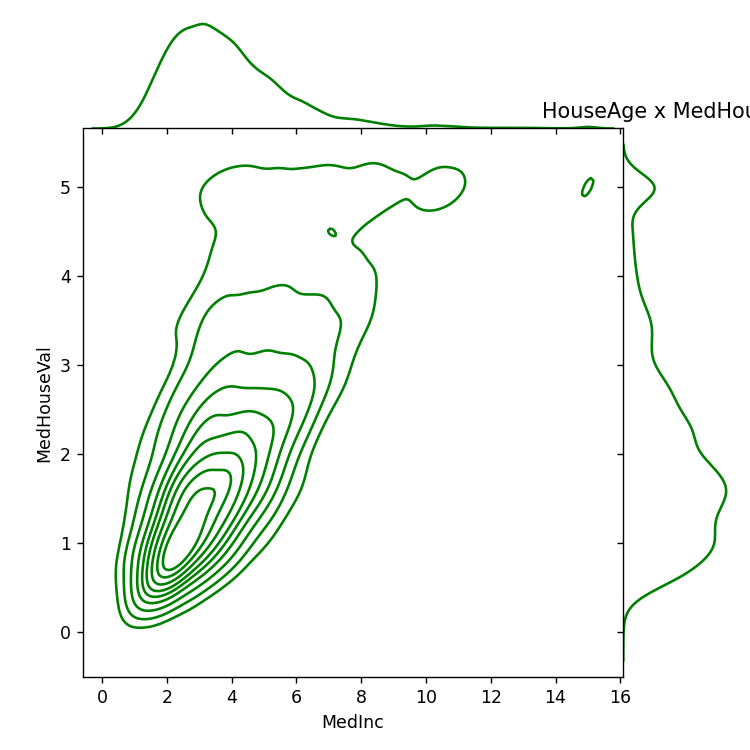

<IPython.core.display.Javascript object>


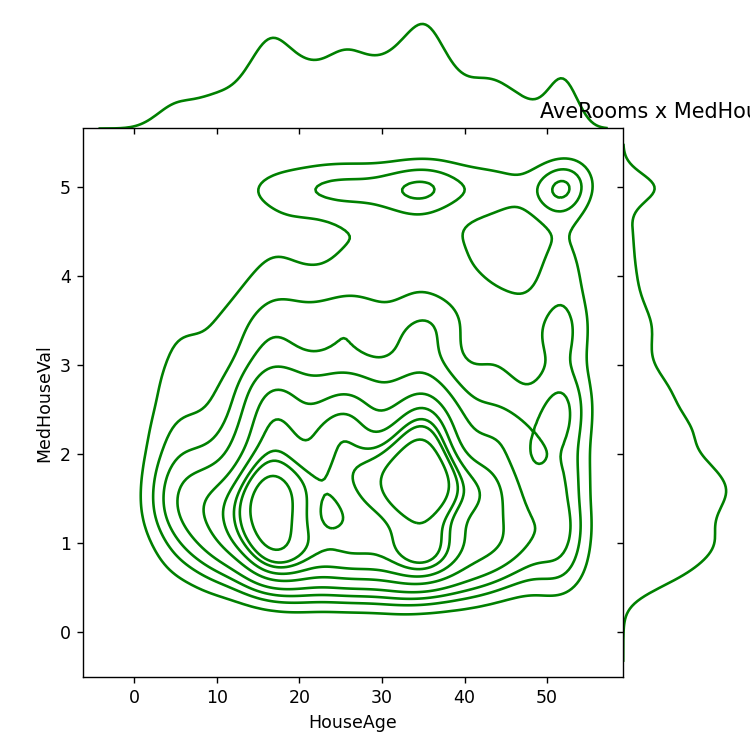

<IPython.core.display.Javascript object>


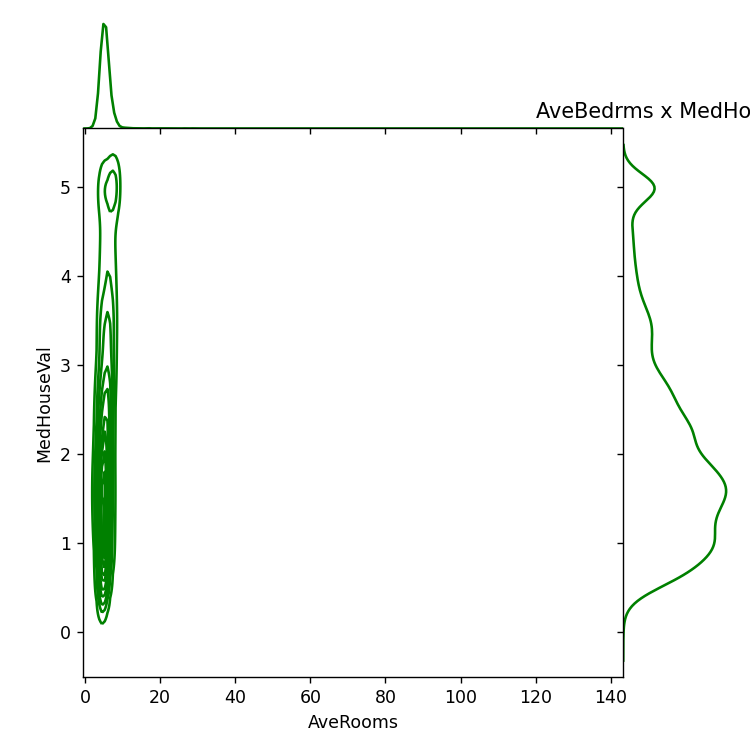

<IPython.core.display.Javascript object>


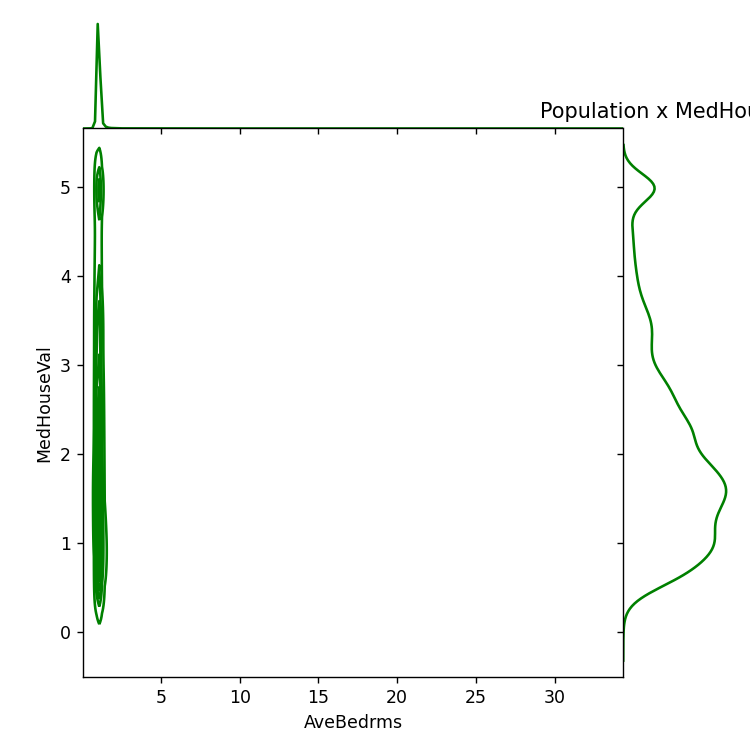

<IPython.core.display.Javascript object>


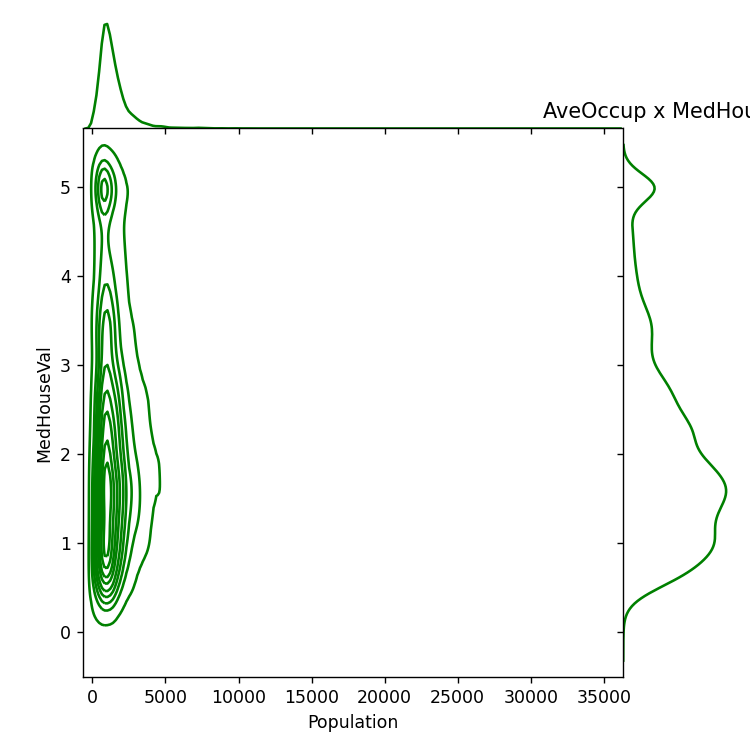

<IPython.core.display.Javascript object>


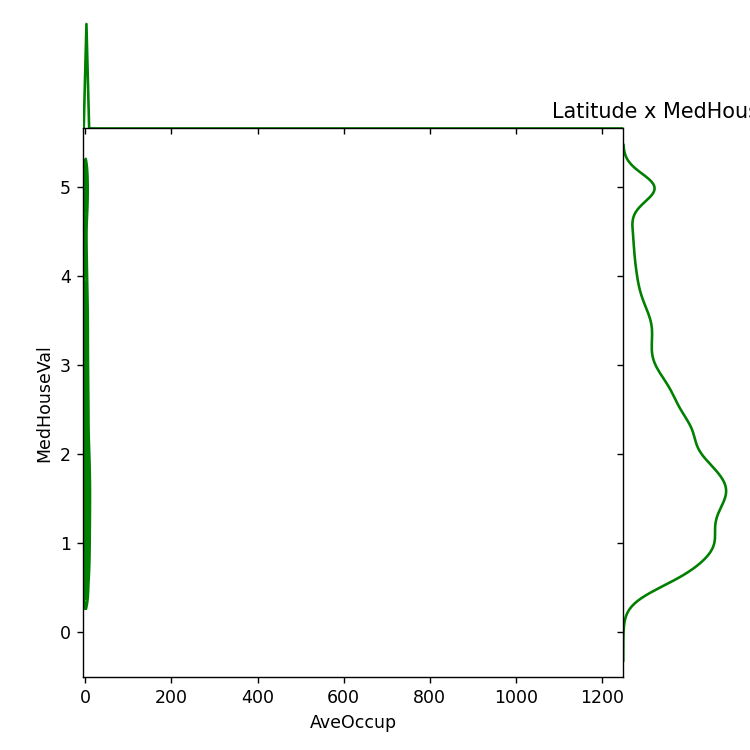

<IPython.core.display.Javascript object>


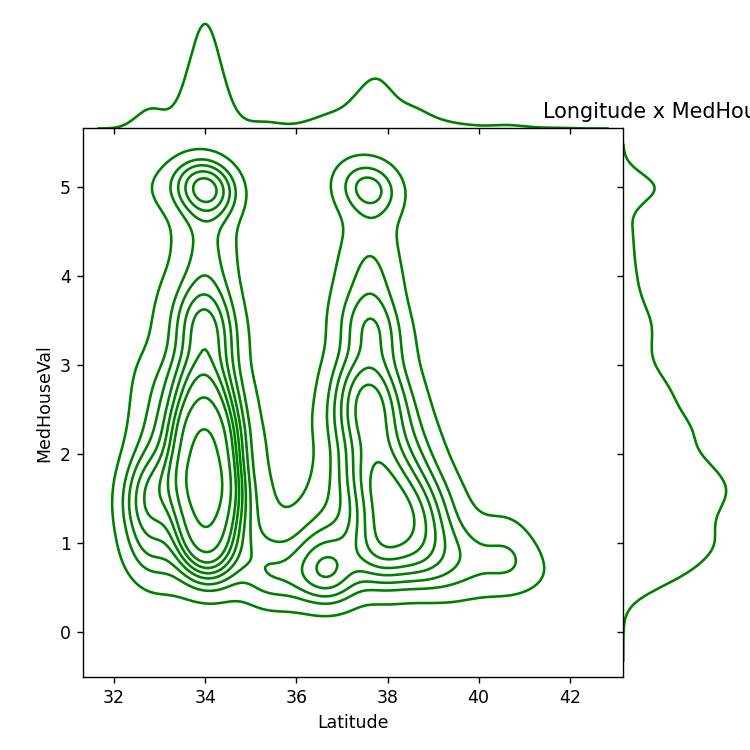

<IPython.core.display.Javascript object>


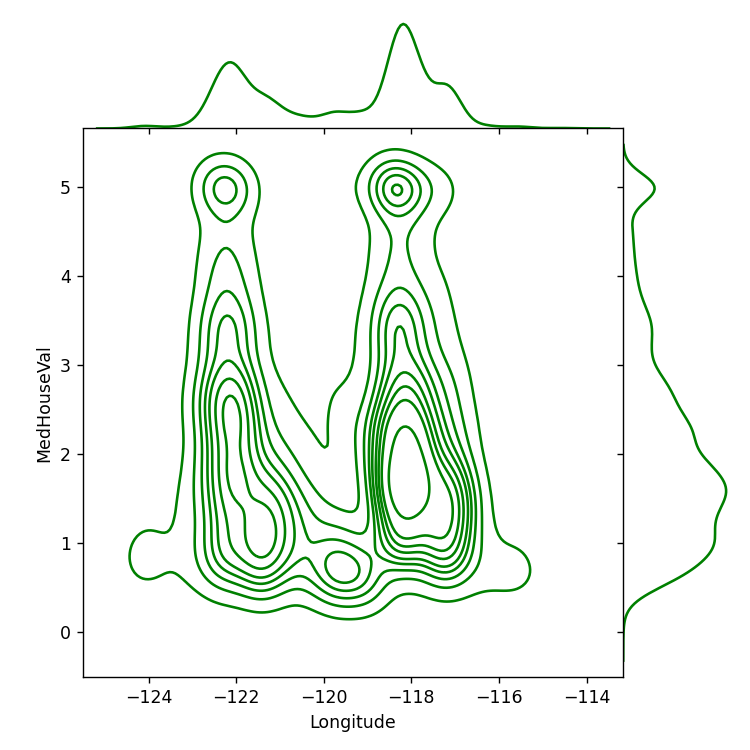

In [51]:
#feature target scatter
for feat in feature_names:
    #plt.title(feat+' x '+ch.target_names[0]) 
    sns.jointplot(data=X, x = feat, y = y, kind = 'kde', space = 0, color = 'g')
plt.show()

<IPython.core.display.Javascript object>


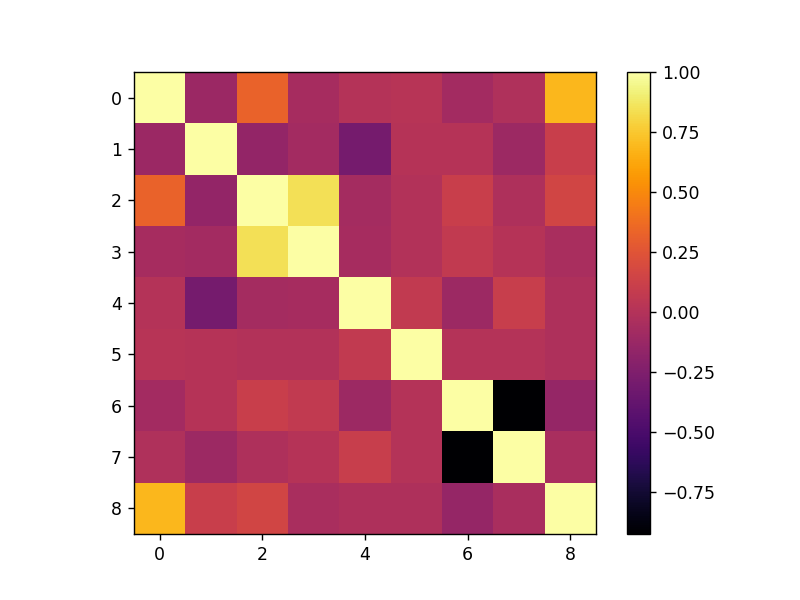

In [60]:
#corr mat of features and target
correlation_matrix = np.zeros((number_of_features+1,number_of_features+1))
for (i, feat) in zip(range(number_of_features), feature_names): 
    measure = X[feat]
    for (j, feat2) in zip(range(number_of_features), feature_names):
        measure2 = X[feat2]
        corr, _ = stats.pearsonr(measure, measure2)
        correlation_matrix[i][j] = corr
for (i, feat) in zip(range(number_of_features), feature_names): #The last column and row represent the feature to target variable correlations
    j = number_of_features
    measure = X[feat]
    measure2 = y
    corr, _ = stats.pearsonr(measure, measure2)
    correlation_matrix[i][j] = corr
    correlation_matrix[j][i] = corr
correlation_matrix[number_of_features][number_of_features] = 1
plt.figure()
plt.imshow(correlation_matrix, cmap = "inferno") #We can draw the matrix using imshow
plt.colorbar()
plt.show()

In [75]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [76]:
reg = LinearRegression().fit(X_train, y_train)
print("Coefficients W")
print(reg.coef_)
print("Intercept W0")
print(reg.intercept_ )
y_pred = reg.predict(X_test)
print("Error")
print(mean_squared_error(y_test, y_pred))

Coefficients W
[  6.46451636   0.49377527 -17.22309506  26.26475839  -0.02767764
  -4.1877334   -3.93843078  -4.35422728]
Intercept W0
3.6401078266059637
Error
0.5305677824766752


In [80]:
ridgeReg = RidgeCV().fit(X_train, y_train)
print("Coefficients W")
print(ridgeReg.coef_)
print("Intercept W0")
print(ridgeReg.intercept_ )
y_pred = ridgeReg.predict(X_test)
print("Error")
print(mean_squared_error(y_test, y_pred))
print("Alpha value")
print(ridgeReg.alpha_)

Coefficients W
[  6.13159184   0.49689893 -11.17655835  18.76453869  -0.02512552
  -3.80940959  -4.0524396   -4.45331347]
Intercept W0
3.7730285729559063
Error
0.5261987223995417
Alpha value
0.1


In [81]:
lassoReg = LassoCV().fit(X_train, y_train)
print("Coefficients W")
print(lassoReg.coef_)
print("Intercept W0")
print(lassoReg.intercept_ )
y_pred = lassoReg.predict(X_test)
print("Error")
print(mean_squared_error(y_test, y_pred))
print("Alpha value")
print(lassoReg.alpha_)

Coefficients W
[  6.12904919   0.49750728 -11.15850971  18.87234597  -0.
  -3.02613824  -4.03796406  -4.43656744]
Intercept W0
3.7549928173471105
Error
0.5267187806054175
Alpha value
0.00010464565033456055
